# Literacy and Book Banning

## Part 4:  Pre-processing and training

### 1. Prepare

#### 1.1. Import modules

In [1]:
import os
from urllib.request import urlopen
from json import loads
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
from matplotlib.pyplot import figure
import matplotlib.colors as clrs
import datetime as dt
from matplotlib.dates import (DateFormatter, MinuteLocator, AutoDateLocator, AutoDateFormatter, datestr2num)
import seaborn as sns
import plotly.express as px

#### 1.2. Read in datasets

In [2]:
total = pd.read_csv (r'cleaned_total.csv')

bans = pd.read_csv (r'cleaned_bans.csv')

scores = pd.read_csv (r'cleaned_scores.csv')

In [3]:
total.head()

,Author,Title,Type of Ban,State,District,Origin of Challenge,Frequency,Date,ID,Students_tested,Reading_proficiency_rate,Average_proficiency,District_bans,Diff_from_mean
0,"Kobabe, Maia",Gender Queer: A Memoir,Banned in Libraries and Classrooms,Idaho,West ada school district,Formal Challenge,41,2022-02-01,1602100.0,19709.0,61.0,54.323556,2,6.676444
1,"Kobabe, Maia",Gender Queer: A Memoir,Banned in Libraries and Classrooms,Texas,Prosper independent school district,Administrator,41,2022-01-01,4836000.0,4581.0,91.0,54.323556,23,36.676444
2,"Kobabe, Maia",Gender Queer: A Memoir,Banned in Libraries and Classrooms,South carolina,Fort mill schools,Administrator,41,2021-11-01,4503900.0,6445.0,63.0,54.323556,1,8.676444
3,"Kobabe, Maia",Gender Queer: A Memoir,Banned in Libraries and Classrooms,Texas,Birdville independent school district,Formal Challenge,41,2021-10-01,4810230.0,15347.0,77.0,54.323556,14,22.676444
4,"Kobabe, Maia",Gender Queer: A Memoir,Banned in Libraries and Classrooms,Texas,Canutillo independent school district,Administrator,41,2021-10-01,4812780.0,3928.0,73.0,54.323556,1,18.676444


### 2. Examine features

#### 2. 1. Histograms

Histograms provide information about the distribution of continuous features

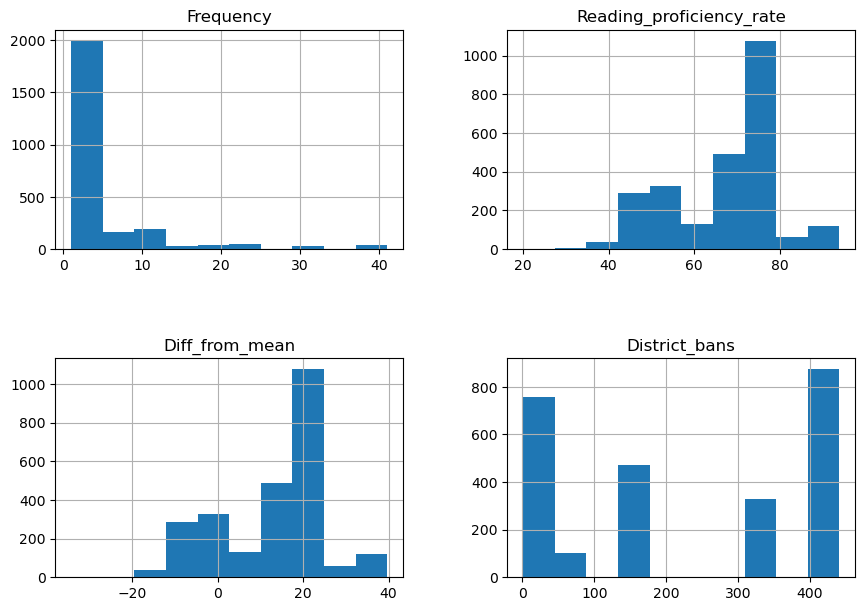

In [4]:
total.hist(column = ['Frequency', 'Reading_proficiency_rate', 'Diff_from_mean', 'District_bans'])
plt.subplots_adjust(left=0, bottom=None, right=1.25, top=1.25, wspace=None, hspace=0.5)

plt.show()

#### 2. 2. Boxplots

Boxplots show the distribution of each numerical feature

            Median: 1.0
Q1: 1.0     IQR: 3.0     Q3: 4.0
      Min: -3.5     Max: 8.5


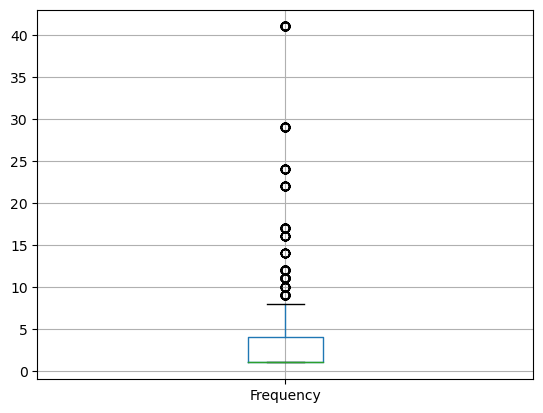

In [5]:
median = total['Frequency'].median()
Q1 = np.quantile(total['Frequency'], .25)
Q3 = np.quantile(total['Frequency'], .75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR

print("            Median:", median)
print("Q1:", Q1, "    IQR:", IQR, "    Q3:", Q3)
print("      Min:", Min, "    Max:", Max)

box1 = total[['Frequency']].boxplot()
plt.show()

            Median: 71.0
Q1: 56.0     IQR: 23.0     Q3: 79.0
      Min: 21.5     Max: 113.5


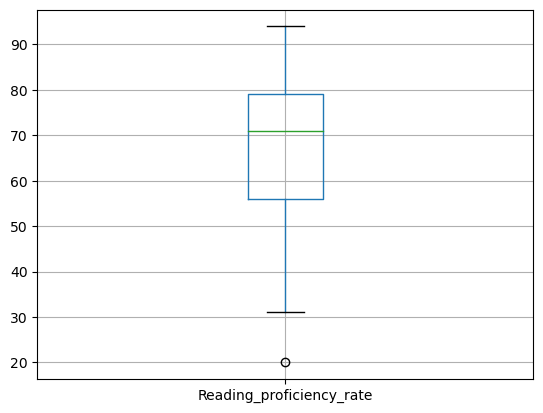

In [6]:
median = total['Reading_proficiency_rate'].median()
Q1 = np.quantile(total['Reading_proficiency_rate'], .25)
Q3 = np.quantile(total['Reading_proficiency_rate'], .75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR

print("            Median:", median)
print("Q1:", Q1, "    IQR:", IQR, "    Q3:", Q3)
print("      Min:", Min, "    Max:", Max)

box2 = total[['Reading_proficiency_rate']].boxplot()
plt.show()

            Median: 16.6764
Q1: 1.6764     IQR: 23.0     Q3: 24.6764
      Min: -32.8236     Max: 59.1764


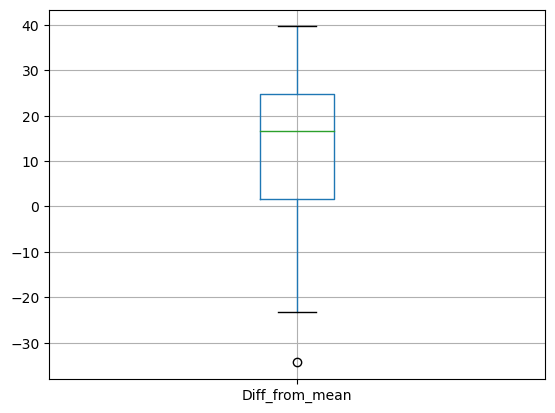

In [7]:
median = round(total['Diff_from_mean'].median(), 4)
Q1 = round(np.quantile(total['Diff_from_mean'], .25), 4)
Q3 = round(np.quantile(total['Diff_from_mean'], .75), 4)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR

print("            Median:", median)
print("Q1:", Q1, "    IQR:", IQR, "    Q3:", Q3)
print("      Min:", Min, "    Max:", Max)

box3 = total[['Diff_from_mean']].boxplot()
plt.show()

            Median: 176.0
Q1: 35.0     IQR: 400.0     Q3: 435.0
      Min: -565.0     Max: 1035.0


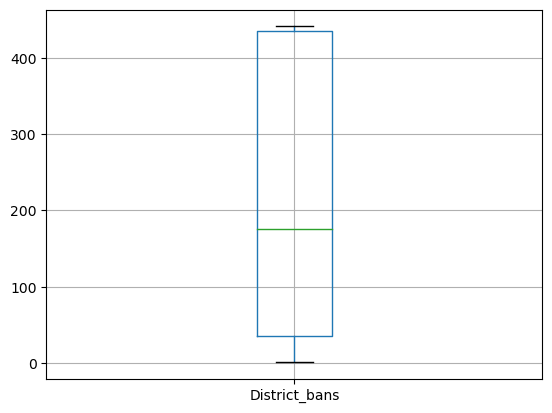

In [8]:
median = total['District_bans'].median()
Q1 = np.quantile(total['District_bans'], .25)
Q3 = np.quantile(total['District_bans'], .75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR

print("            Median:", median)
print("Q1:", Q1, "    IQR:", IQR, "    Q3:", Q3)
print("      Min:", Min, "    Max:", Max)

box5 = total[['District_bans']].boxplot()
plt.show()

#### 2. 3. Pairplots

Pairplots allows us to compare the distribution of features side by side

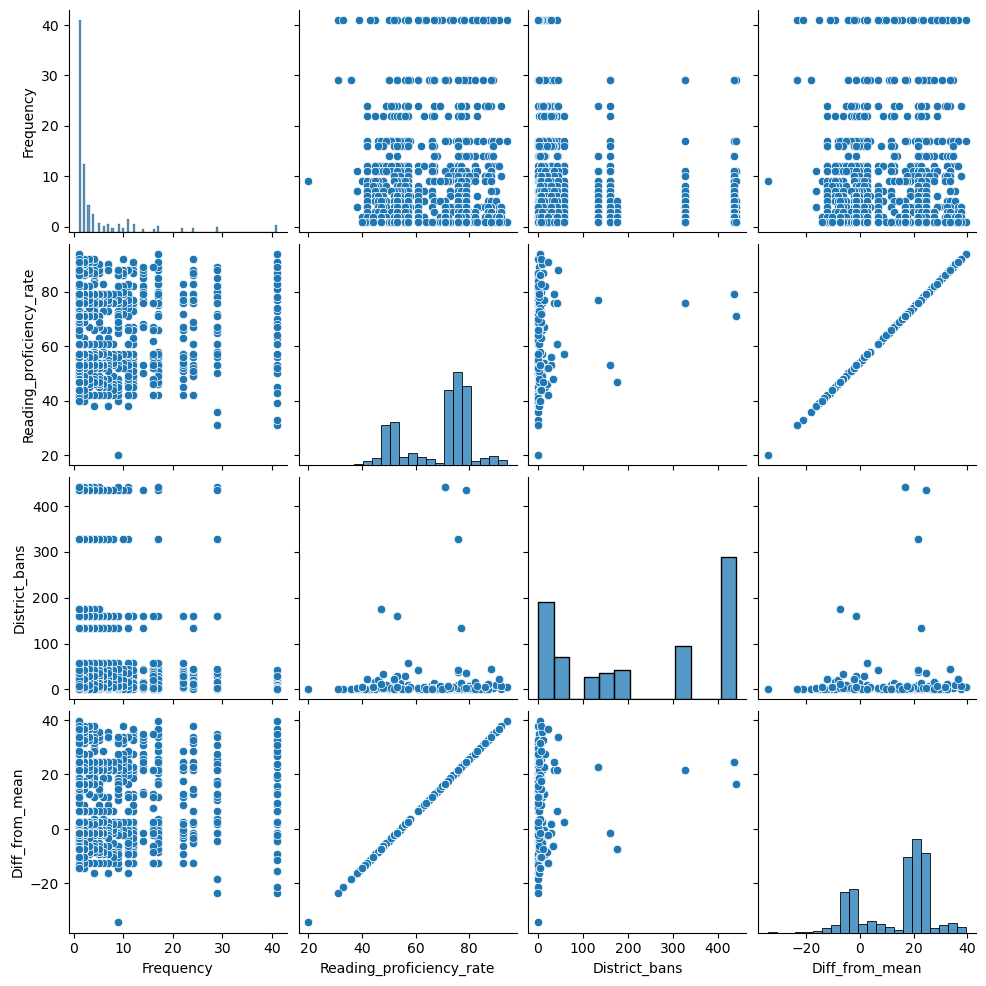

In [9]:
sns.pairplot(total, vars = ['Frequency', 'Reading_proficiency_rate', 'District_bans', 'Diff_from_mean'])

### 3. Create dummy features

Dummy features convert categorical variables to numerical values which facilitates analysis and model creation.  This needs to be done before splitting the data into train and test sets to make sure the test data that we use to perform predicitions has the same shape as the training data the model was trained on.  In this case, I will use one-hot encoding in order to ensure that there is not redundant data that could lead to apparent collinearity that would negatively affect the model(s).

In [10]:
dums = pd.get_dummies(total, drop_first = True)

In [11]:
dums

,Frequency,ID,Students_tested,Reading_proficiency_rate,Average_proficiency,District_bans,Diff_from_mean,"Author_Aciman, André","Author_Acito, Marc","Author_Ada, Alma Flor",...,Date_2021-09-01,Date_2021-10-01,Date_2021-11-01,Date_2021-12-01,Date_2022-01-01,Date_2022-02-01,Date_2022-03-01,Date_2022-04-01,Date_2022-05-01,Date_2022-06-01
0,41,1602100.0,19709.0,61.0,54.323556,2,6.676444,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,41,4836000.0,4581.0,91.0,54.323556,23,36.676444,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,41,4503900.0,6445.0,63.0,54.323556,1,8.676444,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,41,4810230.0,15347.0,77.0,54.323556,14,22.676444,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,41,4812780.0,3928.0,73.0,54.323556,1,18.676444,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,1,1200480.0,71557.0,47.0,54.323556,176,-7.323556,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2528,1,4832940.0,43736.0,79.0,54.323556,435,24.676444,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2529,1,1200480.0,71557.0,47.0,54.323556,176,-7.323556,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2530,1,4700149.0,4388.0,76.0,54.323556,327,21.676444,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 4. Split into training and test sets

Splitting data will let us train machine learning model(s) while leaving some of the data to evaluate these models.  Without splitting the data, we could not accurately determine how well the models perform and would likely give us overfitted models.  Splitting the data must be done before performing transformations like scaling in order to avoid data leakage.

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dums, test_size=0.2, random_state=42)

In [12]:
X = dums.drop('District_bans', axis=1).values
y = dums['District_bans'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 5. Scale features

Scaling certain features can improve the accuracy of models.  

From the above histograms and boxplots, frequency appears to be highly skewed.  I suspect that a log transformation may be useful to make the skew less dramatic.  However, I will examine a few types of transformations to determine whether other methods may be more useful.

In [16]:
pd.options.mode.chained_assignment = None

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train[['Frequency']])

train['normalized_Frequency'] = scaler.transform(train[['Frequency']])

In [18]:
from sklearn.preprocessing import StandardScaler

SS_scaler = StandardScaler()

SS_scaler.fit(train[['Frequency']])

train['standardized_Frequency'] = SS_scaler.transform(train[['Frequency']])

In [19]:
from sklearn.preprocessing import PowerTransformer

log = PowerTransformer()

log.fit(train[['Frequency']])

train['log_Frequency'] = log.transform(train[['Frequency']])

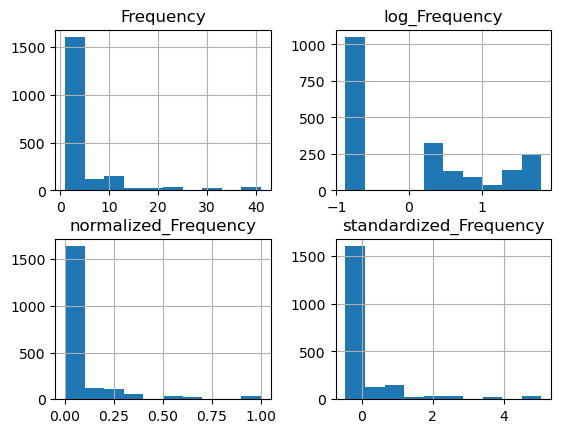

In [20]:
train.hist(column = ['Frequency', 'log_Frequency', 'normalized_Frequency', 'standardized_Frequency'])
plt.show()

Log transformation makes the distribution less skewed.  

<function matplotlib.pyplot.show(close=None, block=None)>

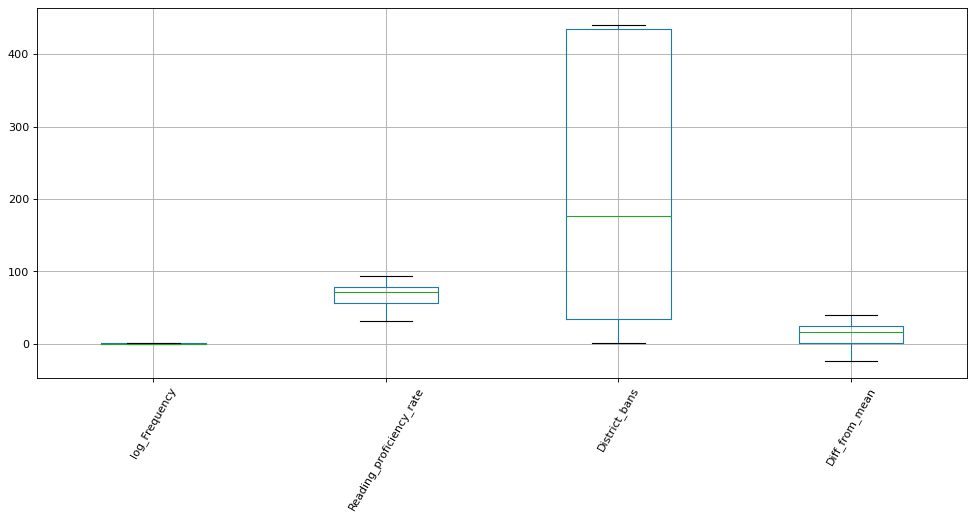

In [22]:
from matplotlib.pyplot import figure

figure(figsize=(15, 6), dpi=80)
train.boxplot(column = ['log_Frequency', 'Reading_proficiency_rate', 'District_bans', 'Diff_from_mean'])
plt.xticks(rotation = 60)
plt.show

While this scale between the log transformed frequency, reading proficiency rate and difference from mean may be close enough to not need scaling, district bans certainly might benefit from scaling.  In order to practice scaling and in case we might decide to use versions of the features that are closer to each other in scale, I will create a normalized version of each of these.  I will not use standardization in this instance to preserve the distribution of each feature as none of these appear normally distributed.

Mix-max scaling / standardization is a linear scaling and therefore affects the values but does not change the distribution.

In [23]:
scaler = MinMaxScaler()

scaler.fit(train[['District_bans']])

train['normalized_dis_ban'] = scaler.transform(train[['District_bans']])

In [24]:
scaler = MinMaxScaler()

scaler.fit(train[['Reading_proficiency_rate']])

train['normalized_prof_rate'] = scaler.transform(train[['Reading_proficiency_rate']])

In [25]:
scaler = MinMaxScaler()

scaler.fit(train[['Diff_from_mean']])

train['normalized_dis_from_mean'] = scaler.transform(train[['Diff_from_mean']])

Examine these scaled features side by side

<function matplotlib.pyplot.show(close=None, block=None)>

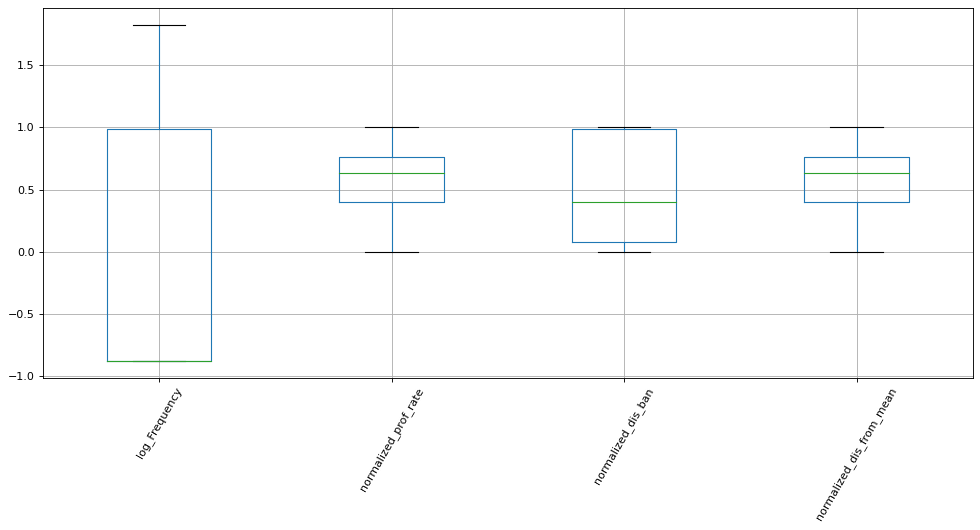

In [26]:
from matplotlib.pyplot import figure

figure(figsize=(15, 6), dpi=80)
train.boxplot(column = ['log_Frequency', 'normalized_prof_rate', 'normalized_dis_ban', 'normalized_dis_from_mean'])
plt.xticks(rotation = 60)
plt.show

These scaled/transformed features can be easily examined together as their ranges are much more similar to the others than the unscaled version of these features.

Save these datasets locally for use in the next steps of the project

In [27]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)
total.to_csv('total2.csv', index=False)
dums.to_csv('dums.csv', index=False)